#### transfer learning
training dinasour images on top of vgg16 imagenet

In [1]:
%pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d larserikrisholm/dinosaur-image-dataset-15-species

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/larserikrisholm/dinosaur-image-dataset-15-species
License(s): apache-2.0
 99% 457M/462M [00:04<00:00, 104MB/s]
100% 462M/462M [00:04<00:00, 100MB/s]


In [2]:
import zipfile
with zipfile.ZipFile("dinosaur-image-dataset-15-species.zip", "r") as zip_ref:
    zip_ref.extractall(".")

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import VGG16

In [4]:
conv_base = VGG16(weights='imagenet',
                  include_top=False, #dont include fully connected layers, include only convolutional layers
                  input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,141,327 (80.65 MB)

 Trainable params: 21,141,327 (80.65 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
conv_base.trainable = False #freeze the convolutional base

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,141,327 (80.65 MB)

 Trainable params: 6,426,639 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
import os
import shutil
import random

# Define paths
dataset_dir = 'dinosaur_dataset'
output_dir = 'dinosaur_dataset_splits'

train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Create output directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get list of species (subfolders)
species = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# Split images
for specie in species:
    specie_dir = os.path.join(dataset_dir, specie)
    images = os.listdir(specie_dir)
    random.shuffle(images)

    train_split = int(0.6 * len(images))
    val_split = int(0.2 * len(images)) + train_split

    train_images = images[:train_split]
    val_images = images[train_split:val_split]
    test_images = images[val_split:]

    # Create subfolders in train, val, and test directories
    os.makedirs(os.path.join(train_dir, specie), exist_ok=True)
    os.makedirs(os.path.join(val_dir, specie), exist_ok=True)
    os.makedirs(os.path.join(test_dir, specie), exist_ok=True)

    # Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(specie_dir, img), os.path.join(train_dir, specie, img))

    for img in val_images:
        shutil.copy(os.path.join(specie_dir, img), os.path.join(val_dir, specie, img))

    for img in test_images:
        shutil.copy(os.path.join(specie_dir, img), os.path.join(test_dir, specie, img))

print("Dataset split into train, validation, and test sets.")

Dataset split into train, validation, and test sets.


In [12]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="dinosaur_dataset_splits/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
)

Found 1461 files belonging to 15 classes.


In [13]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory="dinosaur_dataset_splits/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
)

Found 503 files belonging to 15 classes.


In [14]:
def process(image,label):
    image = tensorflow.cast(image/255. , tensorflow.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 714ms/step - accuracy: 0.1806 - loss: 4.0606 - val_accuracy: 0.4215 - val_loss: 1.8149
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 50s 338ms/step - accuracy: 0.7540 - loss: 0.9079 - val_accuracy: 0.5646 - val_loss: 1.4781
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 322ms/step - accuracy: 0.9351 - loss: 0.4367 - val_accuracy: 0.6044 - val_loss: 1.3297
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 307ms/step - accuracy: 0.9871 - loss: 0.2147 - val_accuracy: 0.6044 - val_loss: 1.2954
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - accuracy: 0.9988 - loss: 0.1137 - val_accuracy: 0.6223 - val_loss: 1.2436
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step - accuracy: 1.0000 - loss: 0.0687 - val_accuracy: 0.6183 - val_loss: 1.2401
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 295ms/step - accuracy: 1.0000 - loss: 0.0465 - val_accuracy: 0.6282 - val_loss: 1.2553
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 1.0000 - loss: 0.0317 - val_accu

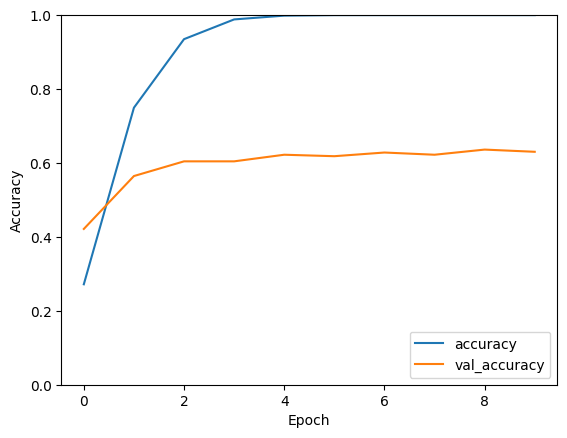

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### model is overfitted, thus doing data augmentation; to train on varied data

In [19]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
batch_size = 32

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
    'dinosaur_dataset_splits/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1461 images belonging to 15 classes.


In [23]:
def process(image,label):
    image = tensorflow.cast(image/255. , tensorflow.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [24]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
history=model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 345ms/step - accuracy: 0.0490 - loss: 3.3647 - val_accuracy: 0.0696 - val_loss: 2.9107
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 362ms/step - accuracy: 0.0727 - loss: 2.9298 - val_accuracy: 0.0656 - val_loss: 2.9174
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 315ms/step - accuracy: 0.0514 - loss: 2.9491 - val_accuracy: 0.0616 - val_loss: 2.8080
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.0575 - loss: 2.8002 - val_accuracy: 0.0656 - val_loss: 2.7575
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 368ms/step - accuracy: 0.0801 - loss: 2.7608 - val_accuracy: 0.0696 - val_loss: 2.7334
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 375ms/step - accuracy: 0.0808 - loss: 2.7177 - val_accuracy: 0.0676 - val_loss: 2.7079
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 304ms/step - accuracy: 0.0779 - loss: 2.7080 - val_accuracy: 0.0716 - val_loss: 2.7079
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 348ms/step - accuracy: 0.0666 - loss: 2.7081 - val_accu

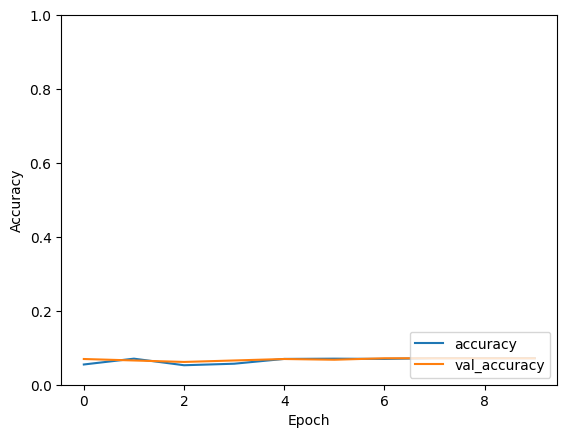

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()